In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
import argparse
sys.path.append(os.path.dirname(os.getcwd()))
from line_extraction_primitives.line import Line, load_lines, save_lines
from line_extraction_primitives.grid import Grid
from footprint_extraction.extract_lines import construct_grid

import numpy as np
import math
import polygon_primitives.primitive_polygon as pp
import polygon_primitives.primitive_edge as pe
import polygon_primitives.helper_methods as phm
import polygon_primitives.file_writer as fw
from footprint_extraction import generate_polygons

import plotting

minimum_wall_height = 2.0
minimum_wall_length = 2.0
filename = "/Users/stouzani/Desktop/Unstructured_ML/Drone/Drone_Data_Capture/pix4d_HQ/pix4d_HQ/2_densification/point_cloud/pix4d_HQ_group1_densified_point_cloud.las"
output_dir = "/Users/stouzani/Desktop/Unstructured_ML/Drone/Drone_Data_Capture/pix4d_HQ/Data_results/"
point_cloud_file = output_dir + "points.txt"
density_filename = "density.txt"

if not os.path.exists(output_dir):
    os.mkdir(output_dir)
    
with open(output_dir + density_filename, 'r') as f:
    density = float(f.readline())

new_segs = load_lines(output_dir + "pix4d_HQ_line_segments.txt")
display_grid, points, offset = construct_grid(point_cloud_file)

In [2]:
edges = []
for i in range(len(new_segs)):
    seg = new_segs[i]
    edge = pe.Edge(seg.get_start(), seg.get_end(), i)
    edges.append(edge) 

Creating polygons...
Iteration 0
Computing polygon heights...
Number of valid polygons detected: 1


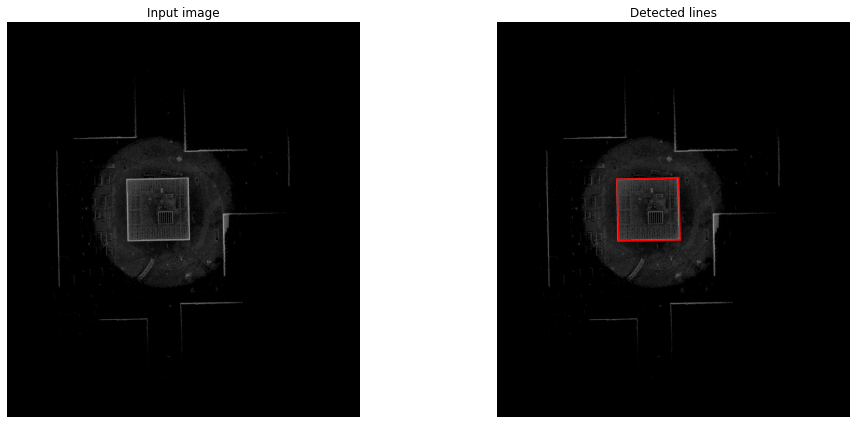

Iteration 1
Computing polygon heights...
Number of valid polygons detected: 0


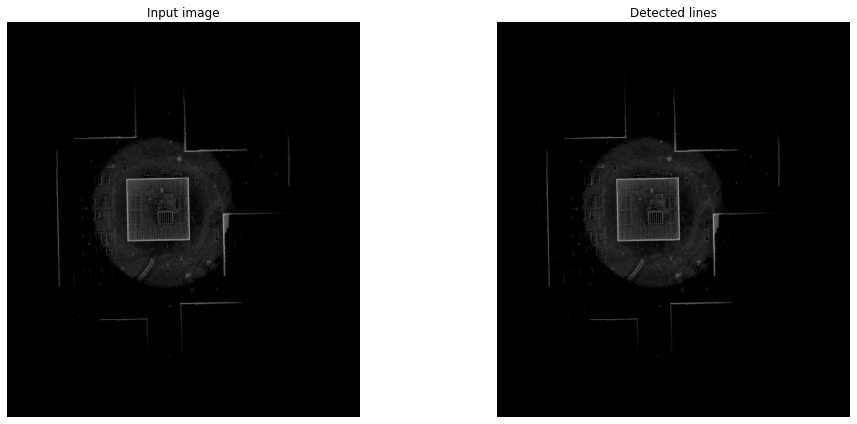

In [3]:
edges, co_p, valid_centers, invalid_centers = generate_polygons.iterative_polygon_detection(edges, density, display_grid, 8, dist=0.8, verbose=True)

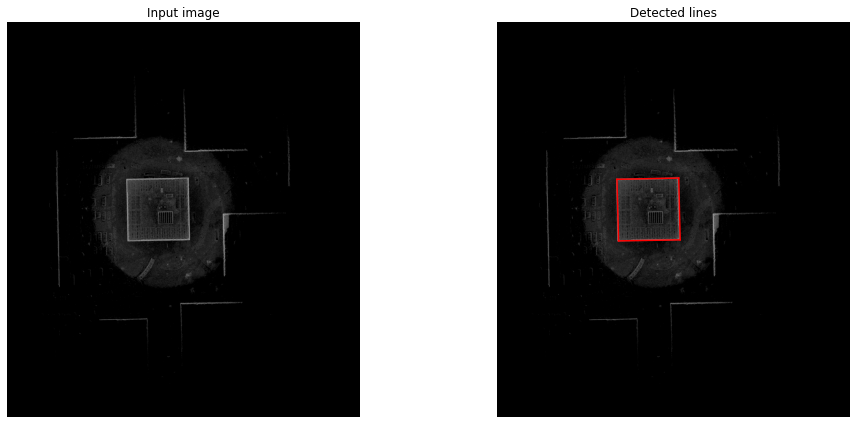

In [4]:
plotting.plot_polygons(display_grid, co_p)

Computing polygon heights...
Next polygon...
4
4
4


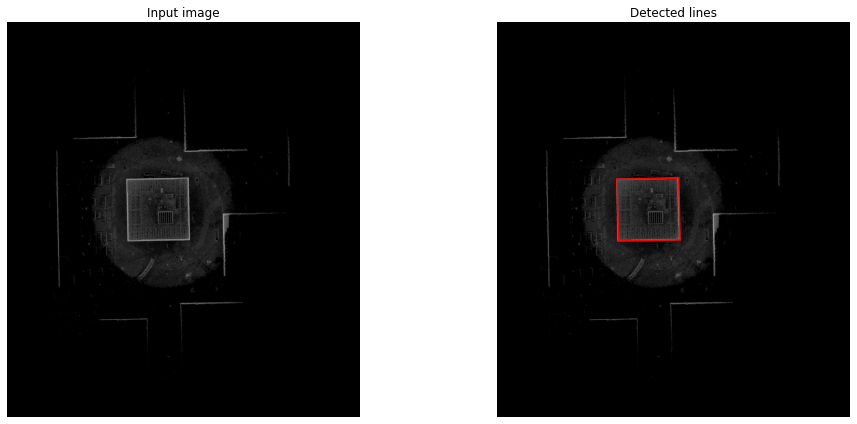

In [5]:
polygons = generate_polygons.deepcopy_polygons(co_p)
generate_polygons.extract_internal_poly_points(polygons, display_grid, dist=0.8)
for polygon in polygons:
        polygon.merged = False
merged_polygons = generate_polygons.construct_merged_polygons(polygons)
merged_polygons = generate_polygons.get_merged_polygons(merged_polygons)
merged_polygons = generate_polygons.get_merged_polygons(merged_polygons)

out_filename = output_dir + "merged_polygons.txt"
fw.save_merged_polygon_points(merged_polygons, offset, filename=out_filename)

plotting.plot_polygons(display_grid, merged_polygons)